In [1]:
# PANDAS & DATETIME
import pandas as pd
from datetime import datetime,timedelta

# NUMPY
import numpy as np

# PLOT LIBRARIES
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# STATSMODEL
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# SCIPY
import scipy.stats as stats
from scipy.integrate import trapz

#SKLEARN FOR PREPROCESSING
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# METRICS
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# IMBALANCE LEARN FOR PREPROCESSING
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler

# SKLEARN FOR MODEL TRAIN
from sklearn.model_selection import RandomizedSearchCV

# MODEL:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
# Import datasets
applicants = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

<span style="background-color: #007ACC; color: white; padding: 5px 10px; font-size: 62px;">DATA VISUALIZATION</span>

> # Start with *<span style="color:red">Binary Variables</span>* analysis

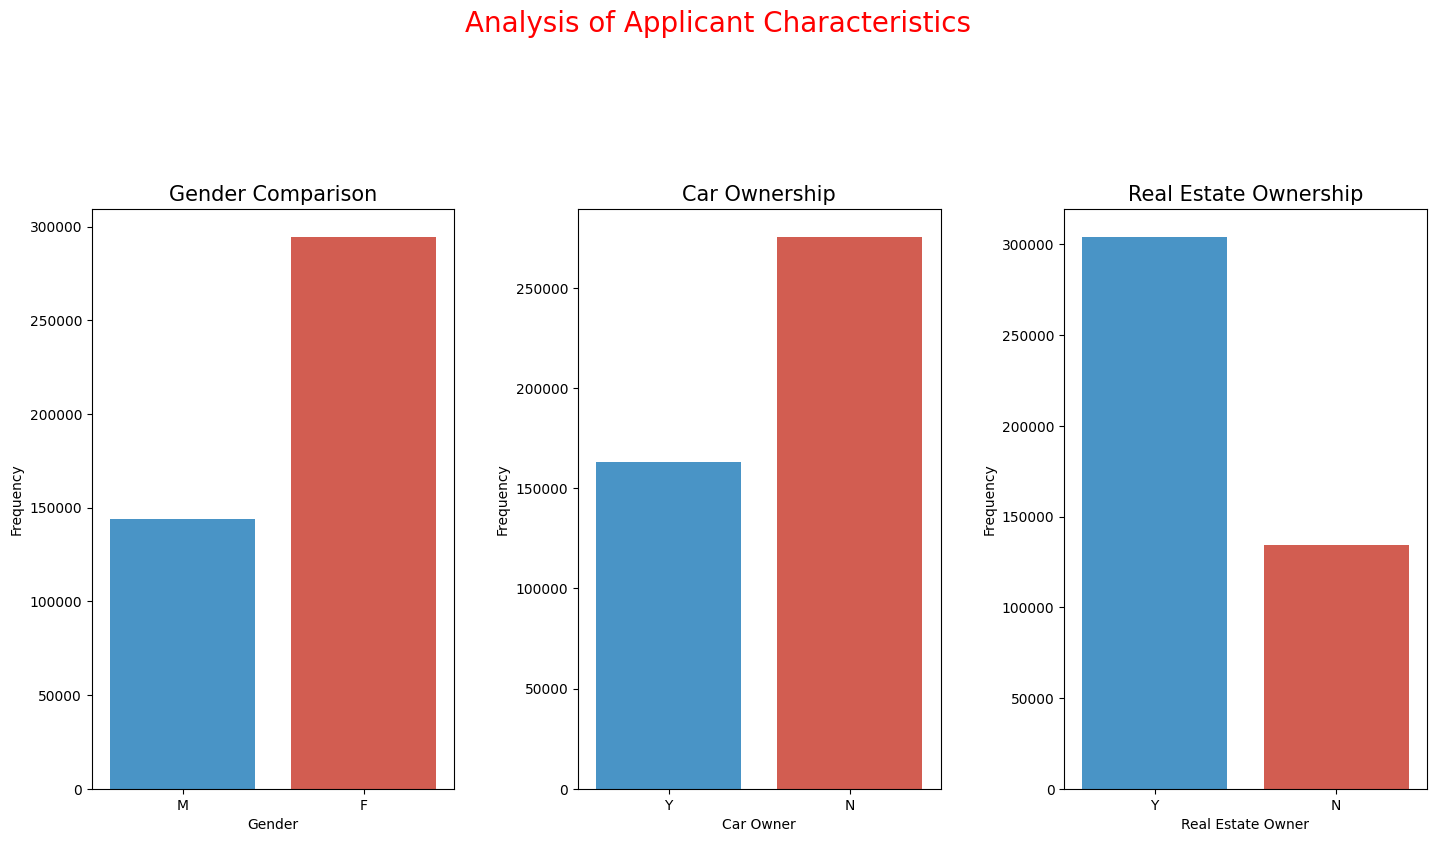

In [3]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# Set a custom color palette
custom_palette = sns.color_palette(["#3498db", "#e74c3c"])

# Set the main title with more spacing
fig.suptitle('Analysis of Applicant Characteristics', size=20, color='r', y=1.08)

# Plot gender comparison
sns.countplot(data=applicants, x='CODE_GENDER', ax=axes[0], palette=custom_palette)
axes[0].set_title('Gender Comparison', fontsize=15)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')

# Plot car ownership
sns.countplot(data=applicants, x='FLAG_OWN_CAR', ax=axes[1], palette=custom_palette)
axes[1].set_title('Car Ownership', fontsize=15)
axes[1].set_xlabel('Car Owner')
axes[1].set_ylabel('Frequency')

# Plot real estate ownership
sns.countplot(data=applicants, x='FLAG_OWN_REALTY', ax=axes[2], palette=custom_palette)
axes[2].set_title('Real Estate Ownership', fontsize=15)
axes[2].set_xlabel('Real Estate Owner')
axes[2].set_ylabel('Frequency')

# Add some extra space between subplots
plt.tight_layout(pad=3)

# Show the plot
plt.show()

# Analysis of Applicant Characteristics

In this analysis, we explore key characteristics of applicants to gain insights into their demographic and ownership profiles. We focus on three variables: 'Gender Comparison,' 'Car Owner,' and 'Real Estate Owner.' Let's delve into the findings:

## Gender Comparison

The 'Gender Comparison' plot illustrates the gender distribution among applicants. We observe the following:

- There is a **significant disparity** between the number of male and female applicants.
- The number of female applicants is **approximately twice** that of male applicants.

## Car Owner

The 'Car Owner' plot provides insights into car ownership among applicants:

- A **substantial portion** of applicants do not own a car.
- The frequency of applicants who own a car is comparatively lower, implying that a significant portion of applicants **lacks vehicle ownership**.

## Real Estate Owner

The 'Real Estate Owner' plot examines the ownership of real estate properties:

- **Most applicants are real estate owners.**
- The frequency of applicants who own real estate is higher, indicating that a majority of applicants **have investments in real estate**.

## Overall Observations

A standout observation from this analysis is the **significant gender disparity** among applicants, with a notably higher number of female applicants. Additionally, the majority of applicants **own real estate properties**, while a substantial portion **does not own a car**.

These findings provide valuable insights into the demographic and ownership characteristics of the applicant pool, which can inform further analyses and decision-making processes.


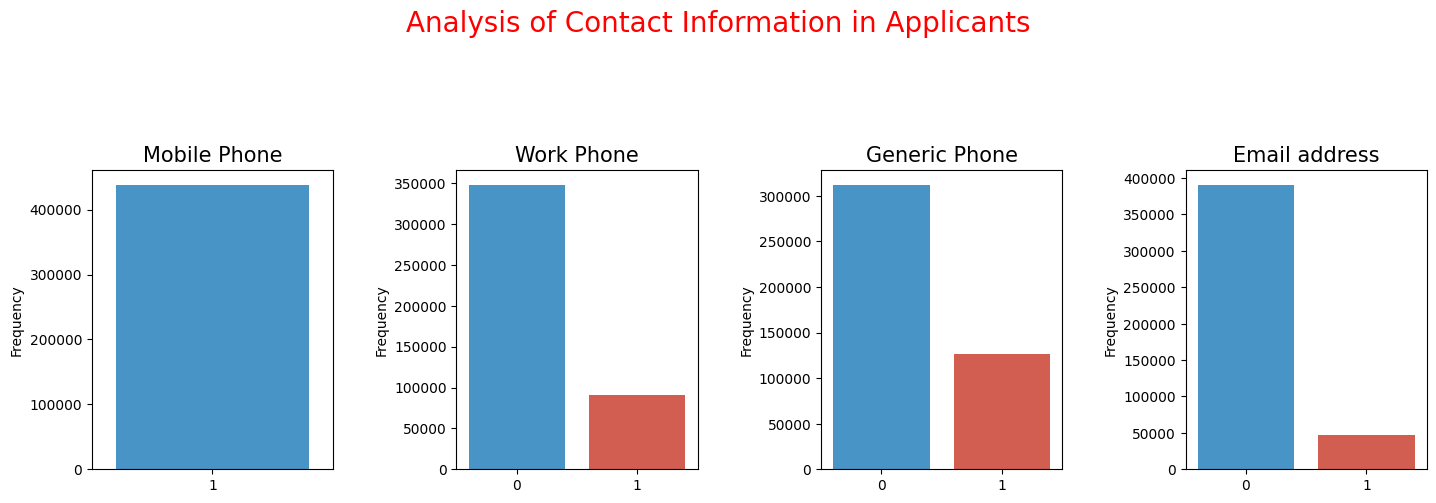

In [4]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Set a custom color palette
custom_palette = sns.color_palette(["#3498db", "#e74c3c"])

# Set the main title with more spacing
fig.suptitle('Analysis of Contact Information in Applicants', size=20, color='r', y=1.05)

# Plot mobile phone
sns.countplot(data=applicants, x='FLAG_MOBIL', ax=axes[0], palette=custom_palette)
axes[0].set_title('Mobile Phone', fontsize=15)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

# Plot work phone
sns.countplot(data=applicants, x='FLAG_WORK_PHONE', ax=axes[1], palette=custom_palette)
axes[1].set_title('Work Phone', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')

# Plot generic phone
sns.countplot(data=applicants, x='FLAG_PHONE', ax=axes[2], palette=custom_palette)
axes[2].set_title('Generic Phone', fontsize=15)
axes[2].set_xlabel('')
axes[2].set_ylabel('Frequency')

# Plot email address
sns.countplot(data=applicants, x='FLAG_EMAIL', ax=axes[3], palette=custom_palette)
axes[3].set_title('Email address', fontsize=15)
axes[3].set_xlabel('')
axes[3].set_ylabel('Frequency')

# Add some extra space between subplots
plt.tight_layout(pad=3)

# Show the plot
plt.show()

# Analysis of Contact Information in Applicants

In this analysis, we examine the contact information of applicants to gain insights into their communication methods. Specifically, we explore four binary variables related to contact information: Mobile Phone, Work Phone, Generic Phone, and Email Address.

## Key Findings

### 1. Mobile Phone

- **Observation**: 
  - Every applicant seems to possess at least one mobile phone, indicating universal mobile phone ownership among applicants.

### 2. Work Phone

- **Observations**:
  - A smaller proportion of applicants have a work phone.
  - The frequency of applicants with a work phone is relatively lower compared to those without.

### 3. Generic Phone

- **Observations**:
  - The 'Generic Phone' category suggests whether applicants have any phone other than a mobile or work phone.
  - The frequency of applicants with a generic phone is intermediate, indicating that some applicants have additional phone lines or devices.

### 4. Email Address

- **Observations**:
  - The 'Email Address' category represents whether applicants have provided an email address.
  - The majority of applicants have provided an email address.
  - The frequency of applicants with an email address is significantly higher than those without, suggesting that email communication is prevalent among applicants.


> ## *<span style="color:red">Discrete & Continuous variables</span>* analysis

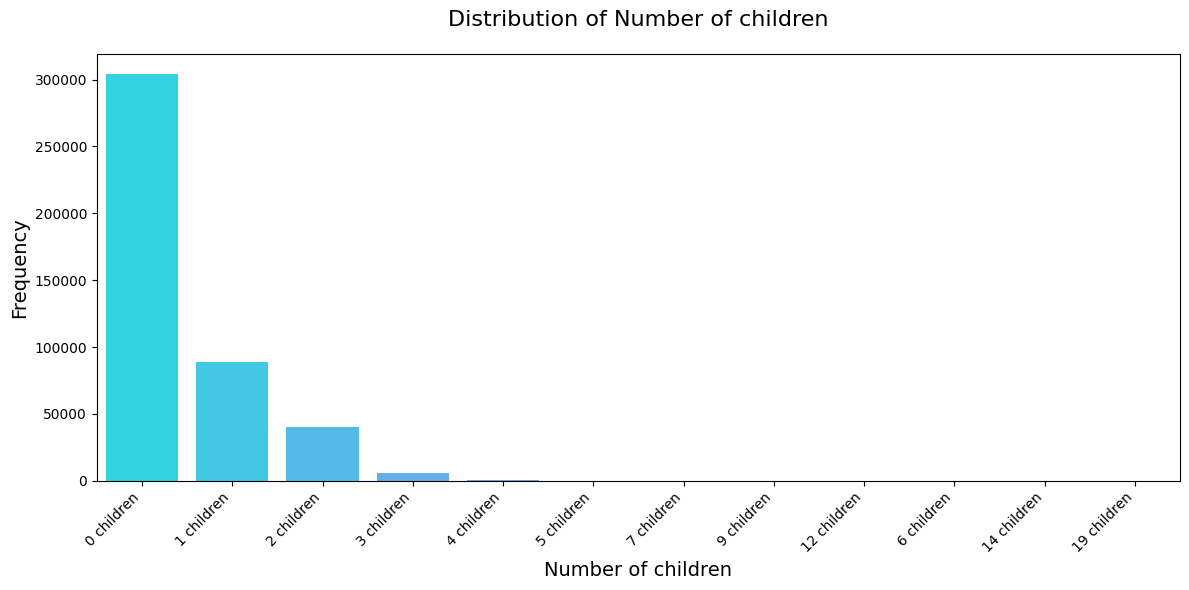

In [5]:
# Calculate the order based on the frequency of family members
order = applicants['CNT_CHILDREN'].value_counts().index

# Define custom colors for the bars
custom_palette = sns.color_palette("cool", n_colors=len(order))

# Create a countplot for the number of family members with the specified order and custom colors
plt.figure(figsize=(12, 6))  # Set the figure size
ax = sns.countplot(
    x=applicants['CNT_CHILDREN'],
    palette=custom_palette,  # Use custom colors
    order=order
)

# Customize labels for the y-axis and x-axis
plt.xlabel('Number of children', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize tick labels on the x-axis for better readability
ax.set_xticklabels([f'{count} children' for count in order], fontsize=10, rotation=45, ha="right")

# Customize the title of the plot
ax.set_title('Distribution of Number of children', fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()

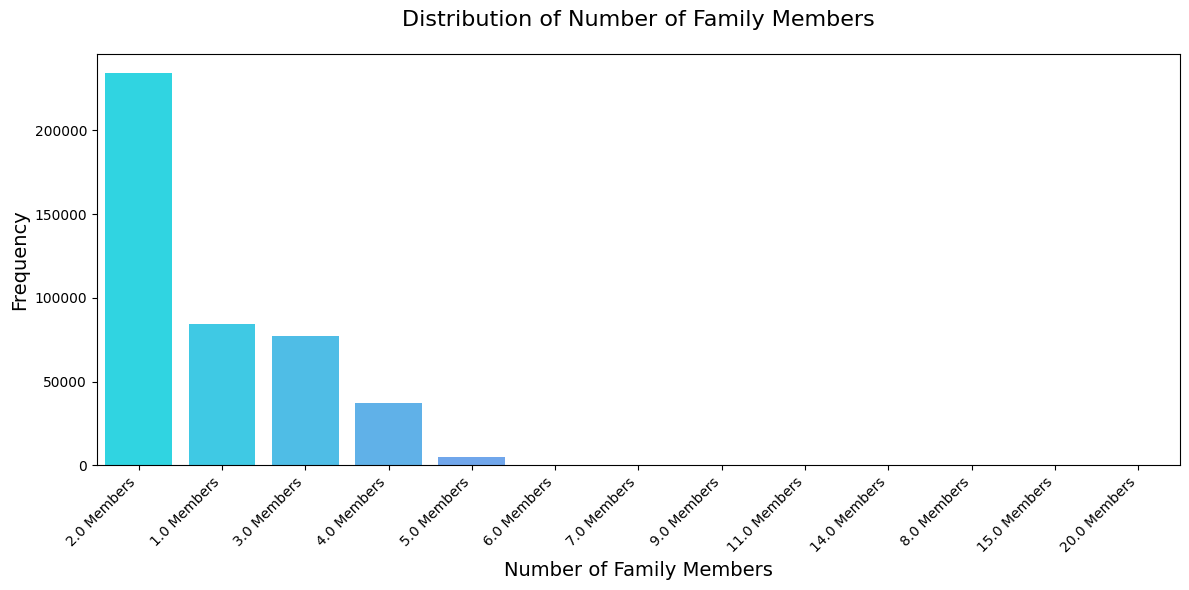

In [6]:
# Calculate the order based on the frequency of family members
order = applicants['CNT_FAM_MEMBERS'].value_counts().index

# Define custom colors for the bars
custom_palette = sns.color_palette("cool", n_colors=len(order))

# Create a countplot for the number of family members with the specified order and custom colors
plt.figure(figsize=(12, 6))  # Set the figure size
ax = sns.countplot(
    x=applicants['CNT_FAM_MEMBERS'],
    palette=custom_palette,  # Use custom colors
    order=order
)

# Customize labels for the y-axis and x-axis
plt.xlabel('Number of Family Members', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


# Customize tick labels on the x-axis for better readability
ax.set_xticklabels([f'{count} Members' for count in order], fontsize=10, rotation=45, ha="right")

# Customize the title of the plot
ax.set_title('Distribution of Number of Family Members', fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()

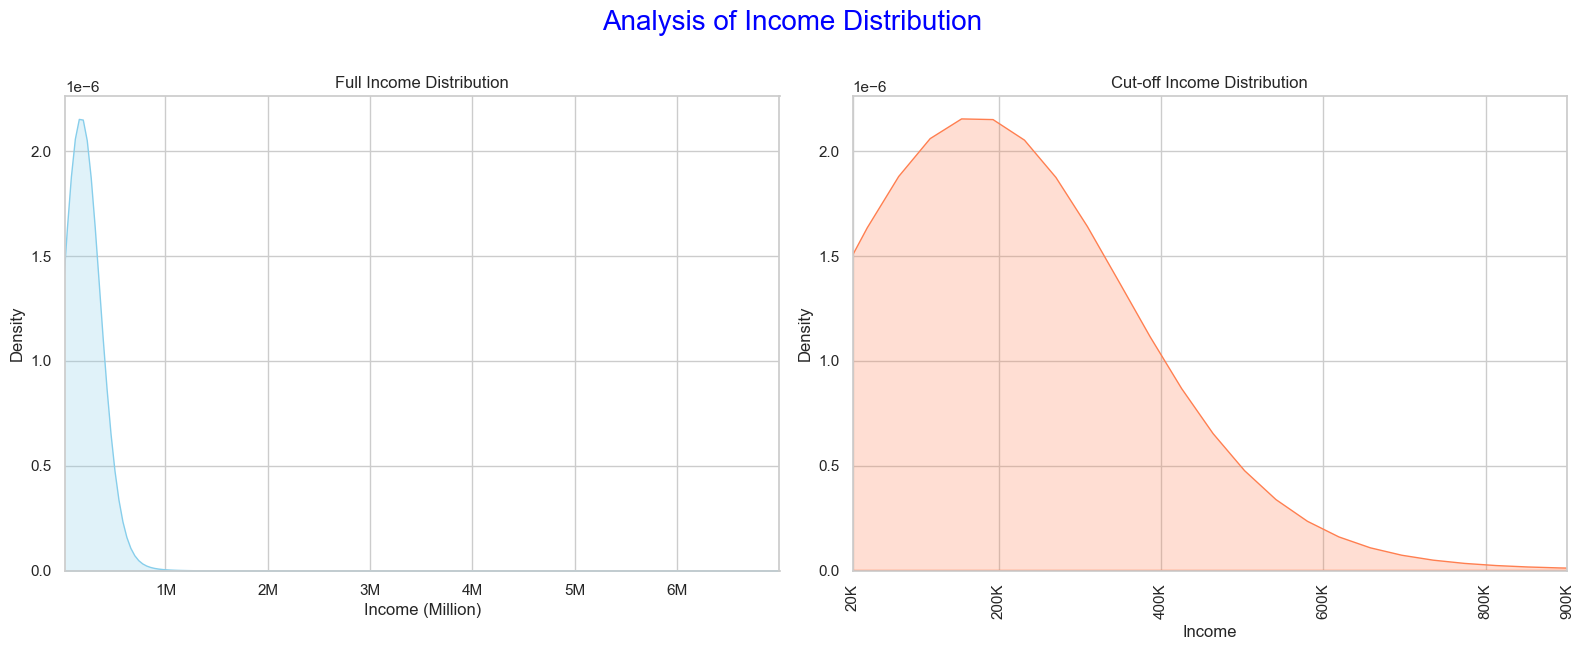

In [7]:
# Create a Seaborn KDE plot with custom styling
plt.figure(figsize=(16, 6))  # Set the figure size

# Customize the styling of the KDE plots
sns.set(style="whitegrid")  # Use a white grid background

# Create a grid of subplots with 1 row and 2 columns
plt.subplot(1, 2, 1)  # The first subplot (left side)
ax1 = sns.kdeplot(applicants['AMT_INCOME_TOTAL'], color='skyblue', fill=True, bw_adjust=20)
plt.xlim(20000, 7000000)
plt.xlabel('Income (Million)')
plt.title('Full Income Distribution')

# Adjust x-axis ticks for millions
ax1.set_xticks([1000000, 2000000, 3000000, 4000000, 5000000, 6000000])
ax1.set_xticklabels(['1M', '2M', '3M', '4M', '5M', '6M'])

plt.subplot(1, 2, 2)  # The second subplot (right side)
ax2 = sns.kdeplot(applicants['AMT_INCOME_TOTAL'], color='coral', fill=True, bw_adjust=20)
income_ticks = [i for i in range(20000, 900000, 100000)]
ax2.set_xticks(income_ticks)
plt.xlim(20000, 900000)
plt.xlabel('Income')
plt.xticks(rotation=90)
plt.title('Cut-off Income Distribution')

# Reduce the number of x-axis ticks
ax2.set_xticks([20000, 200000, 400000, 600000, 800000, 900000])
ax2.set_xticklabels([f'{int(x / 1000)}K' for x in ax2.get_xticks()])
# Adjust spacing between subplots
plt.tight_layout()

# Add a super title with more spacing
plt.suptitle('Analysis of Income Distribution', size=20, color='blue', y=1.08)

# Show the plot
plt.show()


In [8]:
# Try to calculate Area under the curve to check how many values are between certain limits
# Define the income limits
start_point = applicants['AMT_INCOME_TOTAL'].min()
# 500K is an arbitrary value i choose simply looking at the distribution, further analysis is needed to confirm o reject 500K as a
# good upper boundary for keep out outliers
end_point = applicants[applicants['AMT_INCOME_TOTAL'] <= 500000]['AMT_INCOME_TOTAL'].max()

In [9]:
def integral(data, feature, start_point, end_point):
    start_point = start_point
    end_point = end_point

    filtered_df = data[(data[feature] >= start_point) & (data[feature] <= end_point)]

    # Calculate the area between the income limits using trapezoidal approximation
    x_values = filtered_df.index
    y_values = filtered_df[feature]
    area_between_points = np.trapz(y_values, x=x_values)

    # Calculate the total area under the entire 'AMT_INCOME_TOTAL' column
    x_total = data.index
    y_total = data[feature]
    total_area = np.trapz(y_total, x=x_total)

    # Calculate the percentage of the area
    percentage_area = (area_between_points / total_area) * 100

    return f"The percentage of the area under the curve between {start_point} and {end_point} is about: {percentage_area:.2f}%"

In [10]:
integral(applicants,'AMT_INCOME_TOTAL',start_point,end_point)

'The percentage of the area under the curve between 26100.0 and 499500.0 is about: 96.49%'

# Comprehensive Data Analysis Report

## Introduction

This comprehensive report provides a detailed analysis of various aspects of applicant data. The analysis is based on visualizations and insights derived from three different plots. Each section discusses the findings and conclusions related to the specific plot.

---

## Section 1: Number of Children for Applicants

### Plot Description

The first section focuses on the distribution of the number of children among applicants.

#### Findings

- **Most Applicants Have 0 or 1 Child:** The majority of applicants have either 0 or 1 child, suggesting that a significant portion of the dataset has small families.
- **Few Applicants Have 2 or More Children:** The frequency of applicants with 2 or more children decreases as the number of children increases, indicating that fewer applicants have larger families.
- **Imbalanced Distribution:** The distribution of the number of children is imbalanced, with a long tail on the right side, which may indicate potential data quality issues.

#### Conclusion

This section provides an overview of the distribution of the number of children among applicants, emphasizing the prevalence of small families and the potential need for data quality investigation.

---

## Section 2: Number of Family Members for Applicants

### Plot Description

The second section explores the distribution of the number of family members among applicants.

#### Findings

- **Most Applicants Have 2 or 3 Family Members:** The majority of applicants have either 2 or 3 family members, indicating that many applicants have small families.
- **Variability in Family Size:** There is variability in family sizes, with some applicants having larger families, including those with 1 or 4 family members.
- **Imbalanced Distribution:** The distribution of family sizes is imbalanced, similar to the number of children distribution, raising potential data quality concerns.

#### Conclusion

This section provides insights into the distribution of family sizes among applicants, highlighting the prevalence of small families and the presence of data quality considerations.

---

## Section 3: Analysis of Income Distribution

### Plot Description

In this section, we delve into the analysis of income distribution among applicants, building upon the visualizations and calculations from the previous code.

#### Findings

- **Low to Moderate Incomes:** In the left subplot depicting the full income distribution, the left peak of the distribution represents applicants with lower to moderate incomes. This group comprises the majority of the dataset, indicating a common income range among the applicants.
- **Outliers:** On the right side of both plots, a long and pronounced tail can be observed. This tail signifies income outliers with exceptionally high incomes compared to the majority. These outliers are visible in both the full income distribution and the cutoff income distribution, suggesting their presence within various income ranges.
- **Negatively Skewed Distribution:** The pronounced tail of high-income outliers results in a negatively skewed distribution. This skewness highlights the asymmetry of the income distribution, with a longer tail on the lower-income side and a shorter but higher tail on the higher-income side.
- **Area under Curve:** Calculating the area under the curve provided us with the interesting information that more than 90% of the data is between the minimum income value of the dataset and a maximum of no more than 500K. Since the variable has a range between about 20K and more than 6M, it is definitely something to remember when we go to work on outliers.

---

## Overall Conclusion

In conclusion, this comprehensive report offers insights into various aspects of applicant data, including family size, number of children, and income distribution. These visualizations provide valuable information for further analysis and decision-making. However, the presence of imbalanced distributions and potential data quality issues should be taken into account when using this data.

---


> # *<span style="color:red">Categorical variables</span>* analysis

In [12]:
def count_plot(data, feature, rot=None, palette='inferno'):
    # Set style and context for the plot
    plt.figure(figsize=(10, 8))
    sns.set(style="whitegrid")
    sns.set_context("talk")

    # Create the countplot
    ax = sns.countplot(x=data[feature], palette=palette,
                       order=data[feature].value_counts().index)

    # Customize labels for the y-axis and x-axis
    plt.ylabel('Frequency', fontsize=14, labelpad=20)
    plt.xlabel('Category', fontsize=14, labelpad=20)

    # Add a super title
    plt.suptitle(f"Distribution of {feature}", size=20, color='blue', y=1.05)

    # Rotate x-axis labels if rotation is specified
    if rot is not None and isinstance(rot, int):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rot)

    # Show the plot
    plt.tight_layout()
    plt.show()


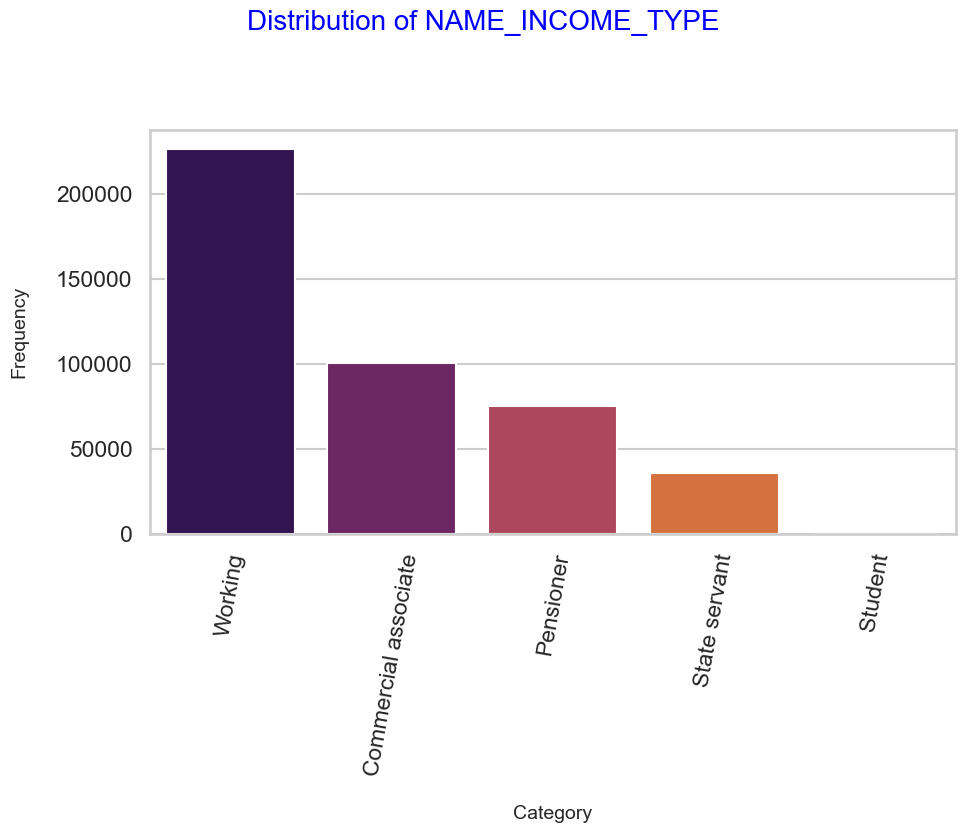

In [13]:
count_plot(applicants,'NAME_INCOME_TYPE',rot = 80)

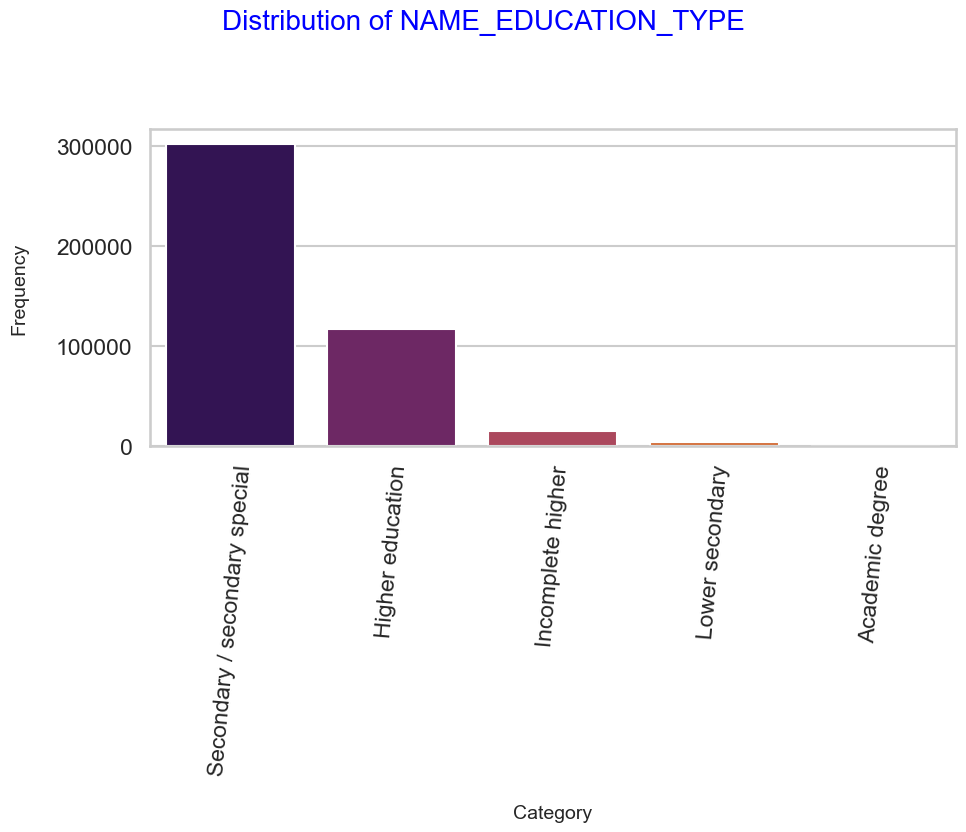

In [14]:
count_plot(applicants,'NAME_EDUCATION_TYPE',rot=85)

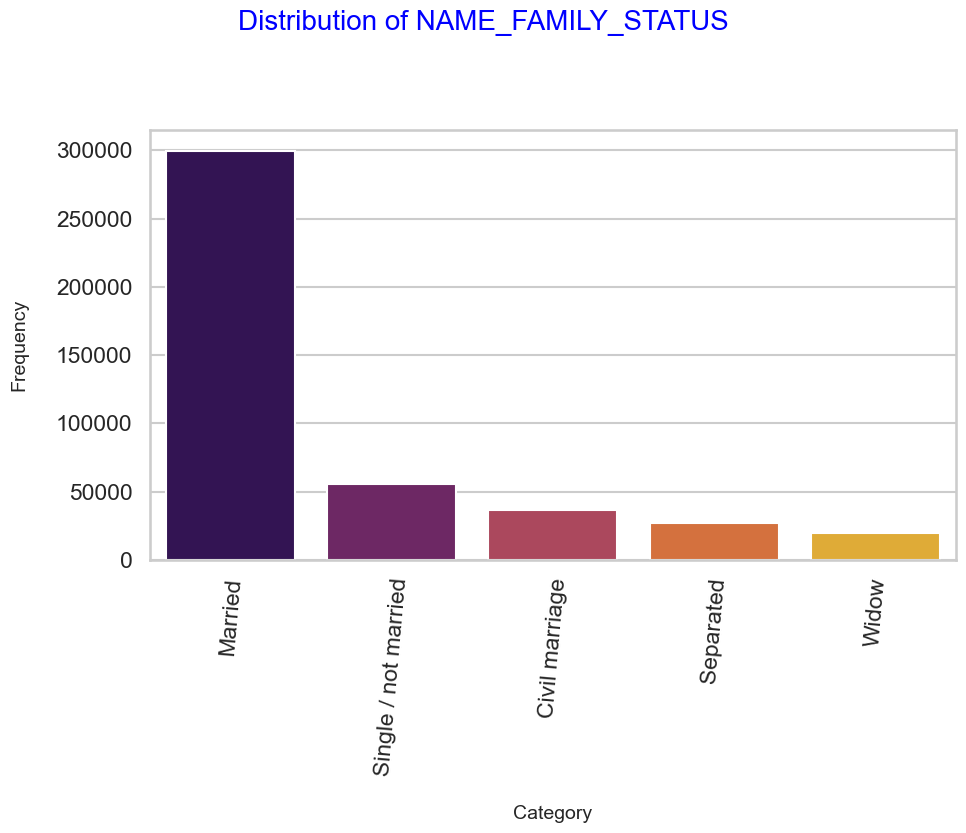

In [15]:
count_plot(applicants,'NAME_FAMILY_STATUS',rot=85)

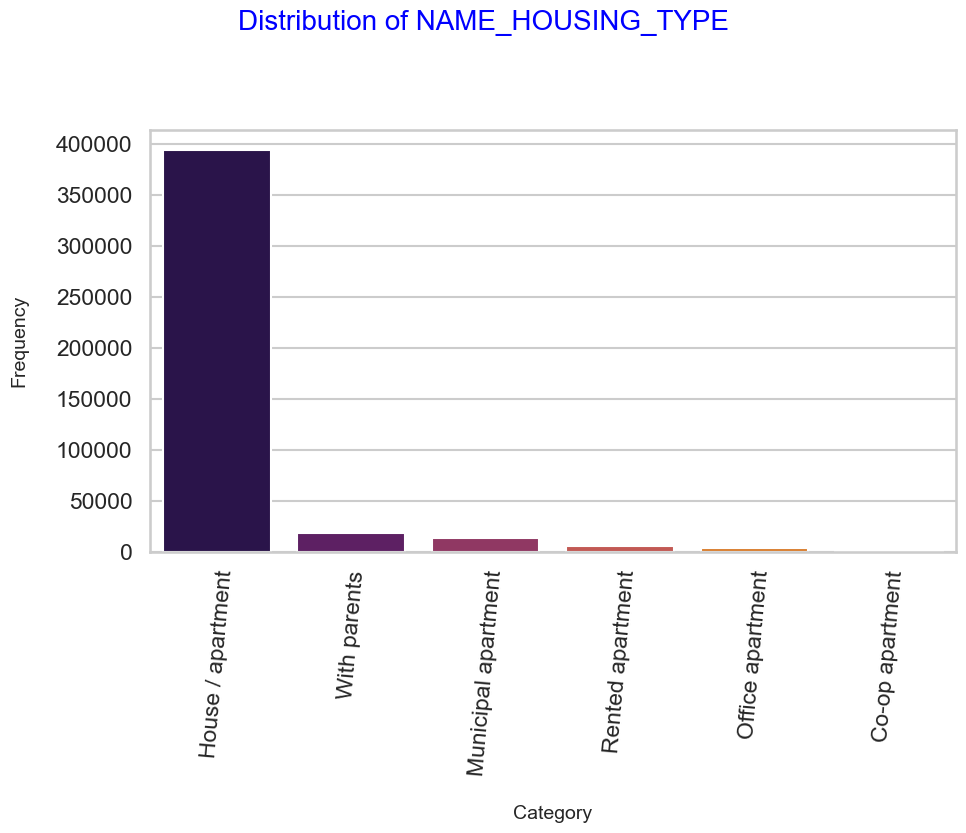

In [16]:
count_plot(applicants,'NAME_HOUSING_TYPE',rot=85)

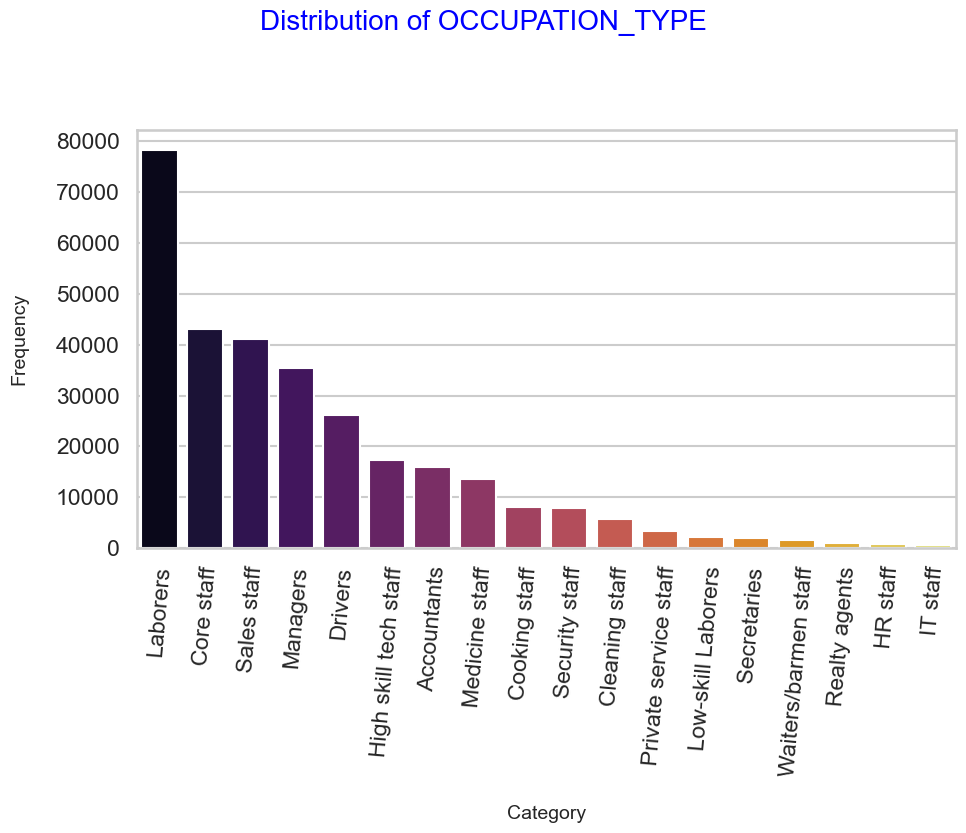

In [17]:
count_plot(applicants,'OCCUPATION_TYPE',rot = 85)

# Comprehensive Data Analysis Reports

---

## Section 1: Income Type Distribution

### Plot Description

This section focuses on the distribution of income types among applicants.

### Findings

1. **Prevalent Income Types:** The most common income types among applicants are "Working" and "Commercial associate," indicating that a substantial portion of applicants falls into these categories.

2. **Few Pensioners:** There are relatively fewer applicants in the "Pensioner" category compared to other income types.

3. **Sparse Data for Maternity Leave:** The "Maternity leave" category has notably sparse data, suggesting it may be an uncommon income type.

### Conclusion

This section provides insights into the distribution of income types among applicants, highlighting the prevalence of certain income types and the presence of sparsely populated categories, such as "Maternity leave."

---

## Section 2: Education Type Distribution

### Plot Description

This section explores the distribution of education types among applicants.

### Findings

1. **Dominance of Secondary Education:** A significant portion of applicants holds "Secondary / secondary special" education as their highest level of education.

2. **Diverse Education Levels:** There is diversity in education levels among applicants, with some holding higher education degrees (e.g., "Higher education" or "Academic degree").

3. **Sparse Data for Incomplete Education:** The categories "Incomplete higher" and "Lower secondary" have fewer applicants, indicating that these education levels are less common among the applicants.

### Conclusion

This section offers insights into the distribution of education types among applicants, emphasizing the prevalence of secondary education and the diversity in educational backgrounds.

---

## Section 3: Family Status Distribution

### Plot Description

This section examines the distribution of family statuses among applicants.

### Findings

1. **Married Applicants Are Most Common:** The majority of applicants are "Married," indicating that this family status is the most prevalent.

2. **Variety in Family Status:** There is some diversity in family statuses, including "Single / not married," "Civil marriage," and others.

3. **Sparse Data for Widow/Widower:** The category "Widow / Widower" has fewer applicants compared to the more common family statuses.

### Conclusion

This section provides insights into the distribution of family statuses among applicants, highlighting the prevalence of "Married" applicants and the presence of less common family statuses.

---

## Section 4: Housing Type Distribution

### Plot Description

This section analyzes the distribution of housing types among applicants.

### Findings

1. **Most Applicants Own or Rent Apartments:** The most common housing types among applicants are "House / apartment" and "With parents." These indicate that the majority either own or rent apartments.

2. **Variety in Housing Types:** There is diversity in housing types, with some applicants living in rented apartments, houses, or having other housing arrangements.

### Conclusion

This section offers insights into the distribution of housing types among applicants, emphasizing the prevalence of "House / apartment" and "With parents" housing types.

---

## Section 5: Occupation Type Distribution

### Plot Description

This section explores the distribution of occupation types among applicants, **noting the presence of missing values (NaN)**.

### Findings

1. **Diverse Occupation Types:** Applicants have diverse occupation types, including "Laborers," "Sales staff," "Core staff," and more.

2. **Missing Occupation Data:** Approximately 134,000 values are missing (NaN) in the occupation type, suggesting a significant amount of data lacks this information.

### Conclusion

This section provides insights into the distribution of occupation types among applicants. However, it's important to note the substantial amount of missing occupation data, which may require further investigation or handling in subsequent analyses.

---

## Overall Conclusion

In conclusion, these comprehensive data analysis reports offer detailed insights into various aspects of applicant data, including income type, education type, family status, housing type, and occupation type. They provide a foundation for further analysis and decision-making, taking into account the prevalence of certain categories and the presence of sparse or missing data where applicable.

---

# **<span style="color:red">Correlation Analysis</span>**

**<span style="color:blue">Analysis Approach:</span>**

To understand the relationships within our dataset, we will perform two distinct correlation analyses:

1. **Categorical Variables Analysis**:
   - For categorical variables, we will employ Cramer's V along with the Chi-square test.
   - This statistical test assesses the independence of categorical variables and unveils potential associations or dependencies between them.

2. **Numerical Variables Analysis**:
   - For numerical variables, we will create a correlation map (correlation matrix).
   - The correlation map visually displays relationships between numerical variables, revealing linear associations and patterns.
   - Additionally, we will compute the Variance Inflation Factor (VIF) to evaluate multicollinearity among numerical features.

These analyses will provide valuable insights into both categorical and numerical aspects of our data, enabling us to uncover significant relationships and patterns.

In [18]:
def split_category(data, categorical=False, numerical=False):
    if categorical:
        categorical_data = data.select_dtypes(exclude=[np.number])
        return categorical_data
    elif numerical:
        numerical_data = data.select_dtypes(include=[np.number])
        return numerical_data
    else:
        raise ValueError("Please specify either 'categorical' or 'numerical' as True to split the data.")


In [19]:
categorical = split_category(applicants,categorical=True)
numerical = split_category(applicants,numerical=True)

In [20]:
def vif_calculation(data):
    # Check for multicollinearity
    vif_data = pd.DataFrame()
    vif_data["features"] = data.columns
    
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                            for i in range(len(data.columns))]
    
    # Print the VIF values for each feature
    print("VIF Values:")
    print(vif_data)
    
    # Print variables with high VIF
    print('~~~~~~~~~')
    print(f"Variables with High VIF:\n{vif_data[vif_data['VIF'] >= 5]}")

In [21]:
vif_calculation(numerical)

VIF Values:
           features         VIF
0                ID    1.001942
1      CNT_CHILDREN    4.768213
2  AMT_INCOME_TOTAL    1.038457
3        DAYS_BIRTH    1.759502
4     DAYS_EMPLOYED    1.708922
5        FLAG_MOBIL  155.022191
6   FLAG_WORK_PHONE    1.179469
7        FLAG_PHONE    1.104457
8        FLAG_EMAIL    1.029106
9   CNT_FAM_MEMBERS    4.627808
~~~~~~~~~
Variables with High VIF:
     features         VIF
5  FLAG_MOBIL  155.022191


In [22]:
numerical_corr = numerical.corr()

In [23]:
def plot_correlation_heatmap(data):
    """
    Create and display a correlation heatmap for numerical variables.

    Parameters:
    data (DataFrame): The input DataFrame containing numerical variables.

    Returns:
    None
    """
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    
    # Create a more visually appealing color palette
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Calculate the correlation matrix
    numerical_corr = data.corr()
    
    # Create the correlation heatmap with enhanced customization
    sns.heatmap(
        numerical_corr, 
        annot=True,
        annot_kws={'size': 12},  # Increase annotation font size
        cmap=cmap,  # Use the custom color palette
        linewidths=0.5,
        fmt=".2f",
        cbar=True,
        square=True,
        center=0,  
        cbar_kws={'label': 'Correlation'},
    )
    
    # Customize labels, title, and rotation for x-axis labels
    plt.xlabel('Variables', fontsize=14)
    plt.ylabel('Variables', fontsize=14)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.show()

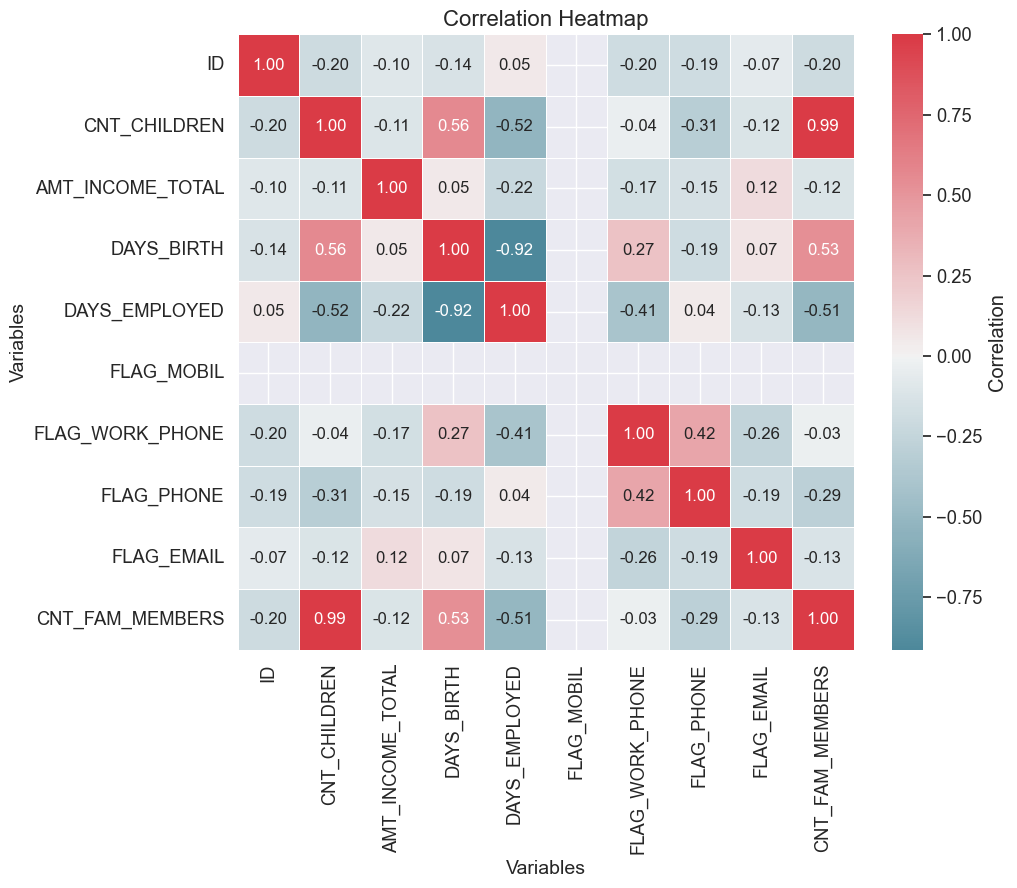

In [24]:
plot_correlation_heatmap(numerical_corr)

### Performing Chi-square test

In [25]:
# Extracting column names 
column_names = categorical.columns
# Assiging column names to row indexs 
chisqmatrix=pd.DataFrame(categorical,columns=column_names,index=column_names)

In [26]:
for icol in column_names:  # Loop over each column (categorical variable) in the DataFrame.
    for jcol in column_names:  # Nested loop to compare with each other column.

        # Create a contingency table for the two categorical columns icol and jcol.
        mycrosstab = pd.crosstab(categorical[icol], categorical[jcol])

        # Perform a chi-square test of independence on the contingency table.
        chi2, _, _, _ = stats.chi2_contingency(mycrosstab)

        # Calculate Cramér's V for the association between icol and jcol.
        n = mycrosstab.values.sum()  # Calculate the total number of observations.
        V = np.sqrt(chi2 / (n * (min(mycrosstab.shape) - 1)))  # Compute Cramér's V.
        V = round(V, 3)  # Round the value to three decimal places for readability.

        # Store the calculated Cramér's V value in the chisqmatrix DataFrame.
        chisqmatrix.loc[icol, jcol] = V
        
# Make values inside chisq matrix float
chisqmatrix = chisqmatrix.astype(float)

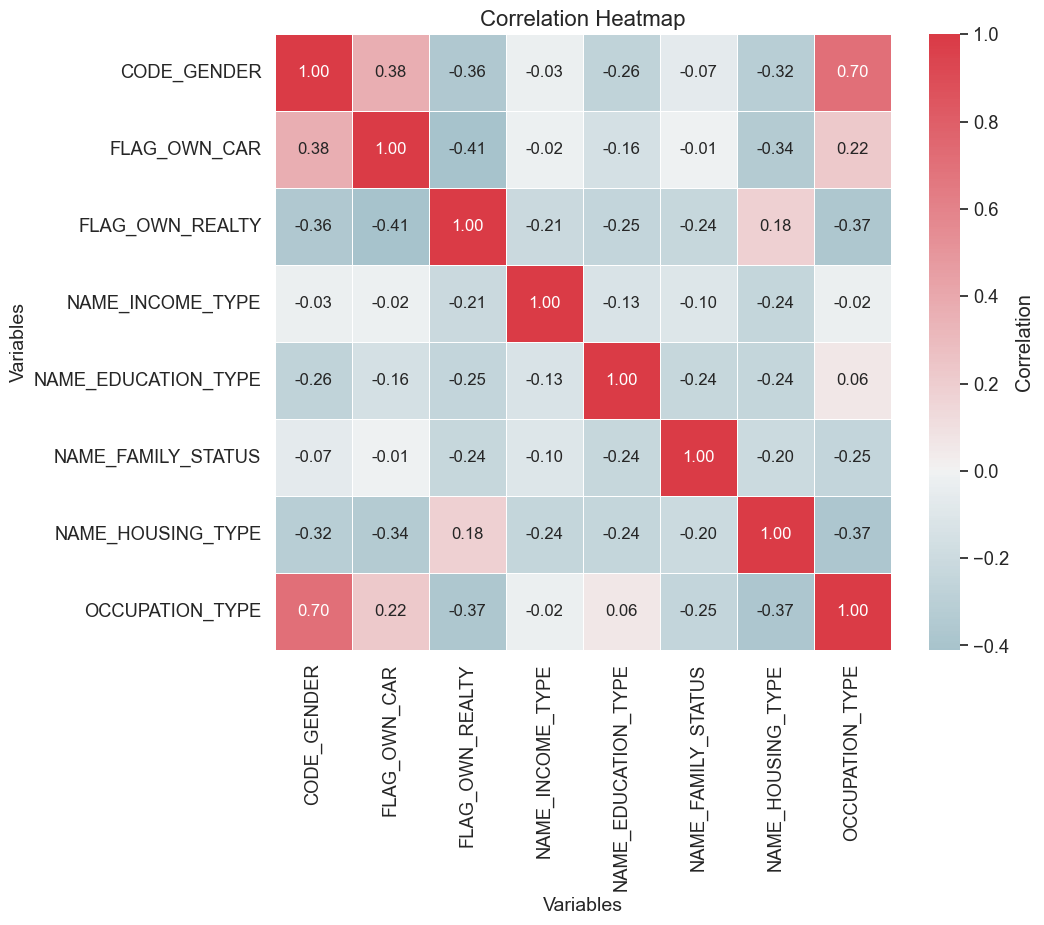

In [27]:
plot_correlation_heatmap(chisqmatrix)

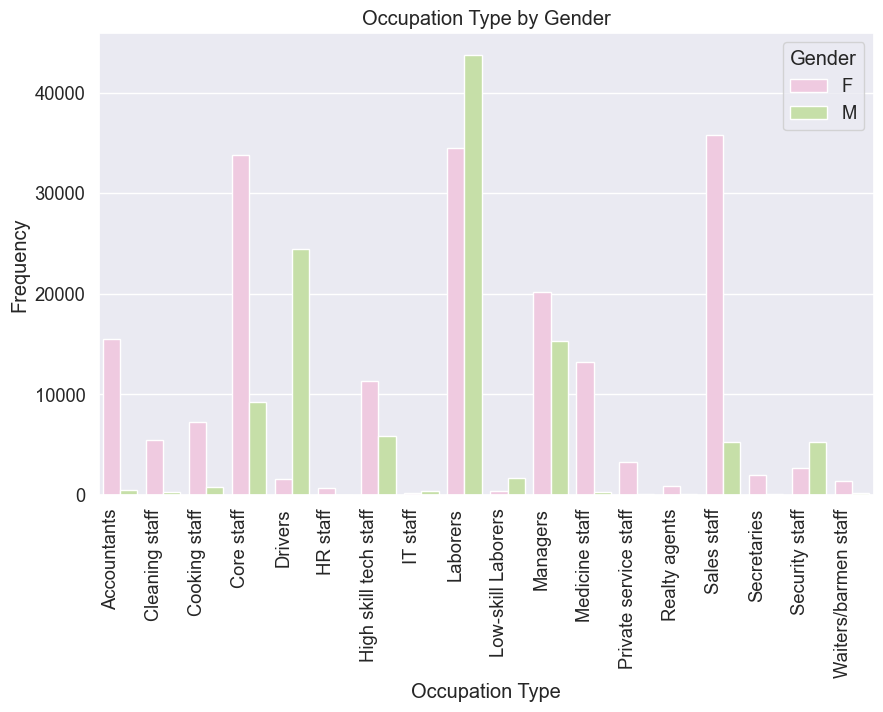

In [28]:
grouped = applicants.groupby(['OCCUPATION_TYPE', 'CODE_GENDER']).size().reset_index(name='Count')

# Create a stacked bar plot using Seaborn with the 'PiYG' color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='OCCUPATION_TYPE', y='Count', hue='CODE_GENDER', data=grouped, palette='PiYG')

# Customize the plot
plt.title('Occupation Type by Gender')
plt.xlabel('Occupation Type')
plt.ylabel('Frequency')
plt.legend(title='Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

# <span style="color:blue">Correlation Analysis Report</span>

*<span style="color:blue">Analysis of Categorical and Numerical Variables</span>*

## <span style="color:green">Introduction</span>
This report presents the results of a correlation analysis conducted on a dataset containing both categorical and numerical variables. The analysis aims to identify associations, dependencies, and multicollinearity within the dataset.

## <span style="color:green">Findings</span>

### <span style="color:red">Categorical Variables Analysis</span>
- The Cramer's V heatmap reveals associations between pairs of categorical variables. In this heatmap, a Cramer's V value of 1 signifies a perfect correlation between two variables, while a value of 0 indicates no correlation at all.
- The heatmap can guide feature selection and help understand relationships among categorical variables.

### <span style="color:red">Numerical Variables Analysis</span>
- The VIF analysis identifies numerical variables that may suffer from multicollinearity. Variables with VIF values greater than or equal to 5 are listed, indicating the need for further investigation.
- The correlation matrix heatmap provides insights into linear relationships between numerical variables. Positive correlations are represented in green, while negative correlations are shown in red.

## <span style="color:green">Conclusion</span>
The correlation analysis conducted on the dataset reveals valuable insights into the relationships among variables. It helps in understanding the interdependencies between categorical variables and identifying multicollinearity issues among numerical features. These findings can guide feature engineering and variable selection.

> In our initial analysis of the dataset, we observed two numeric variables that exhibit a strong correlation:

1. **DAY_BIRTHS** and **DAYS_EMPLOYED**: These variables display a strong negative correlation. However, it is important to note that these data have not yet undergone preprocessing. Upon closer inspection, we found that the **DAY_BIRTHS** variable consists of all positive values, while **DAYS_EMPLOYED** contains many negative values And both refer to dates. This suggests that the negative correlation may primarily result from how the data were input into the dataset. Further analysis is required post-preprocessing to better understand this relationship.

2. **CNT_FAM_MEMBERS** and **CNT_CHILDREN**: These variables exhibit a strong positive correlation. As expected, an increase in the number of children corresponds to an increase in the count of family members. This relationship is intuitive and aligns with our expectations.

3. **CODE_GENDER** and **OCCUPATION_TYPE**: The two variables show a fairly significant correlation of .70 points.
Looking at the graph above it is evident that women dominate in essentially all jobs except as a laborer and a few others.
This may also be due to the fact that the female component in the dataset is as mentioned above significantly higher than the male component.


In our upcoming analysis, we will perform data preprocessing to address any data anomalies or inconsistencies, which will allow us to draw more accurate conclusions regarding the correlations observed.

## <span style="color:green">Recommendations</span>
- For categorical variables, consider using the results of Cramer's V analysis to inform feature selection and potentially reduce dimensionality.
- <span style="color:red">**Note: The variable 'FLAG_MOBIL' exhibits an extremely suspiciously high multicollinearity, which may cause issues in the correlation matrix. This variable should be treated carefully in the preprocessing phase.**</span>
- Address multicollinearity issues among numerical variables with high VIF values, either by removing redundant features or employing dimensionality reduction techniques.
